In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
train_df.fillna(0, inplace = True)

In [5]:
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,0.0,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,0.0,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,0.0,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,0.0,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,0.0,3.899395,4


In [6]:
from sklearn.cluster import DBSCAN

In [7]:
df=train_df[['floor_area', 'site_eui']]
df=pd.DataFrame(df)

In [8]:
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']

In [9]:
clusters=remove_outliers_DBSCAN((train_df['floor_area']),0.5,5)
clusters.value_counts().sort_values(ascending=False)

-1       34678
 528       264
 90        213
 609       176
 721       173
         ...  
 5370        5
 5372        5
 5345        5
 5343        5
 2775        5
Name: cluster, Length: 5552, dtype: int64

In [10]:
mpl.rcParams.update({"axes.grid" : True, "grid.color": "black"})

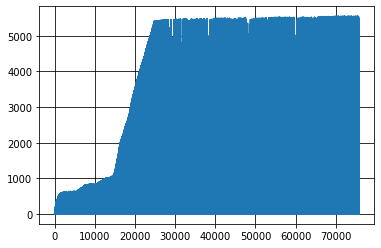

In [11]:
plt.plot(clusters)

In [12]:
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
ind_outlier

Int64Index([   15,    23,    36,    45,    61,    63,    64,    69,    73,
               84,
            ...
            75743, 75744, 75746, 75747, 75749, 75751, 75752, 75753, 75754,
            75756],
           dtype='int64', length=34678)

In [ ]:
# for i in range(0, len(ind_outlier),1):
#     df_final=df.drop([ind_outlier[i]])
#     df=df_final
    
# sns.boxplot(y='floor_area', x='site_eui',data=df_final)
# plt.xticks(rotation=90)

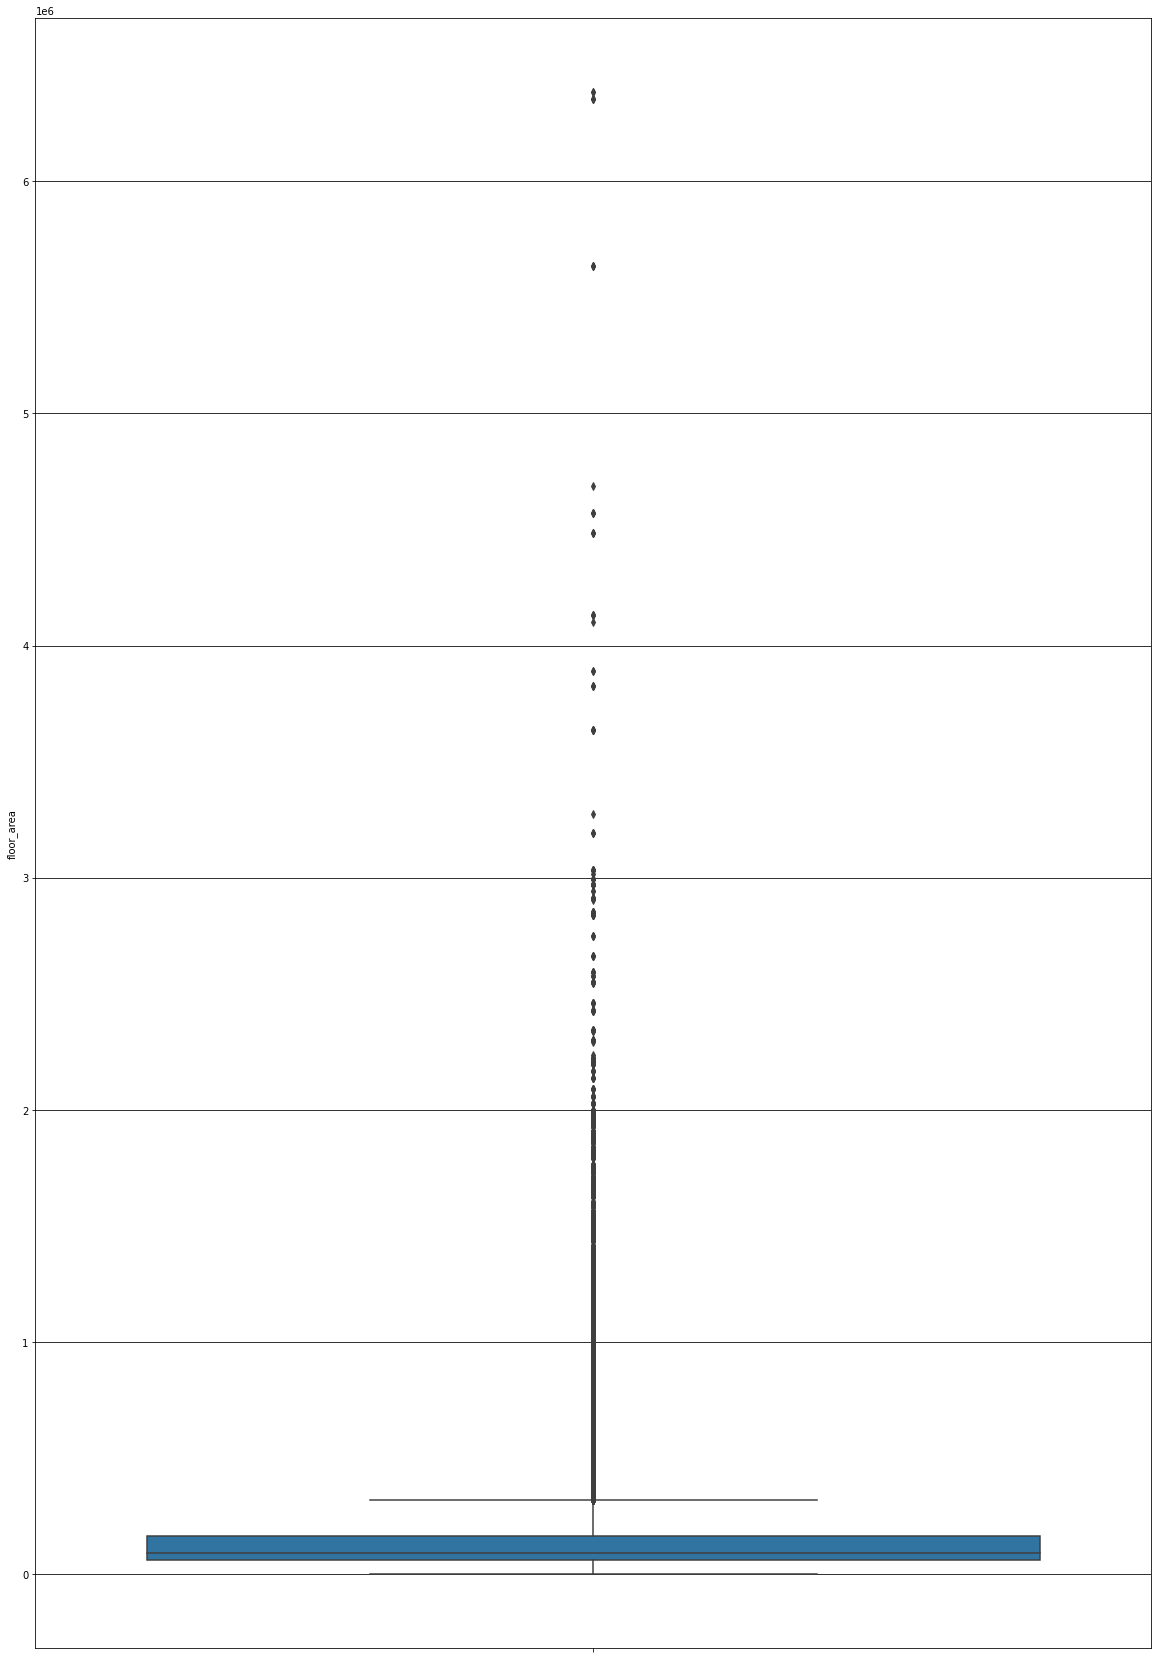

In [13]:
plt.figure(figsize=(20,30))
sns.boxplot(y=train_df['floor_area'])
sns.set(font_scale = 2)

In [14]:
train_df['floor_area'].max()

6385382.0

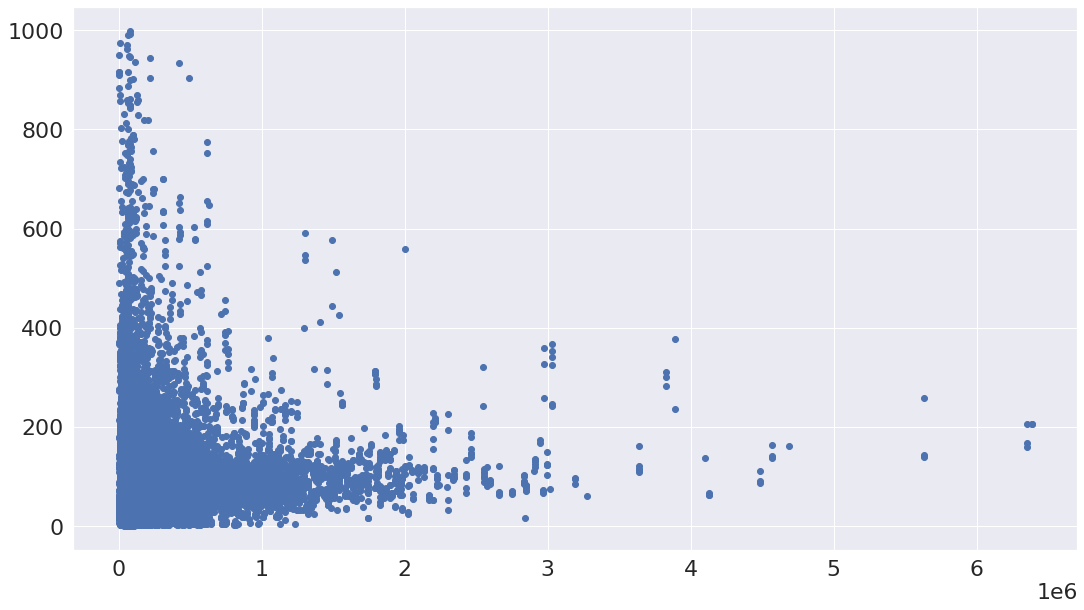

In [15]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(train_df['floor_area'], train_df['site_eui'])

In [16]:
Q1 = np.percentile(train_df['floor_area'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(train_df['floor_area'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

/tmp/ipykernel_4618/326984357.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(train_df['floor_area'], 25,
/tmp/ipykernel_4618/326984357.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(train_df['floor_area'], 75,


In [17]:
IQR

103621.0

In [18]:
upper = train_df['floor_area'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = train_df['floor_area'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0        False
1        False
2        False
3        False
4        False
         ...  
75752    False
75753    False
75754    False
75755    False
75756    False
Name: floor_area, Length: 75757, dtype: bool
(array([   13,    42,    48, ..., 75516, 75618, 75690]),)
Lower bound: 0        False
1        False
2        False
3        False
4        False
         ...  
75752    False
75753    False
75754    False
75755    False
75756    False
Name: floor_area, Length: 75757, dtype: bool
(array([], dtype=int64),)


In [19]:
pd.qcut(train_df['floor_area'], q=5).value_counts()

(942.999, 58275.0]       15154
(76788.0, 111913.0]      15152
(201075.0, 6385382.0]    15151
(58275.0, 76788.0]       15150
(111913.0, 201075.0]     15150
Name: floor_area, dtype: int64

In [20]:
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,0.0,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,0.0,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,0.0,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,0.0,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,0.0,3.899395,4


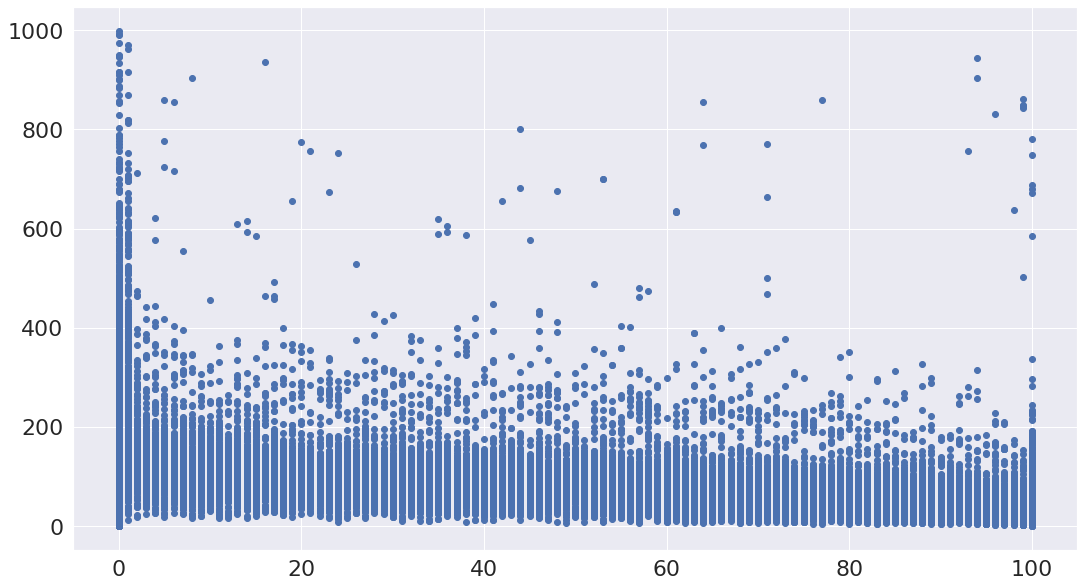

In [21]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(train_df['energy_star_rating'], train_df['site_eui'])

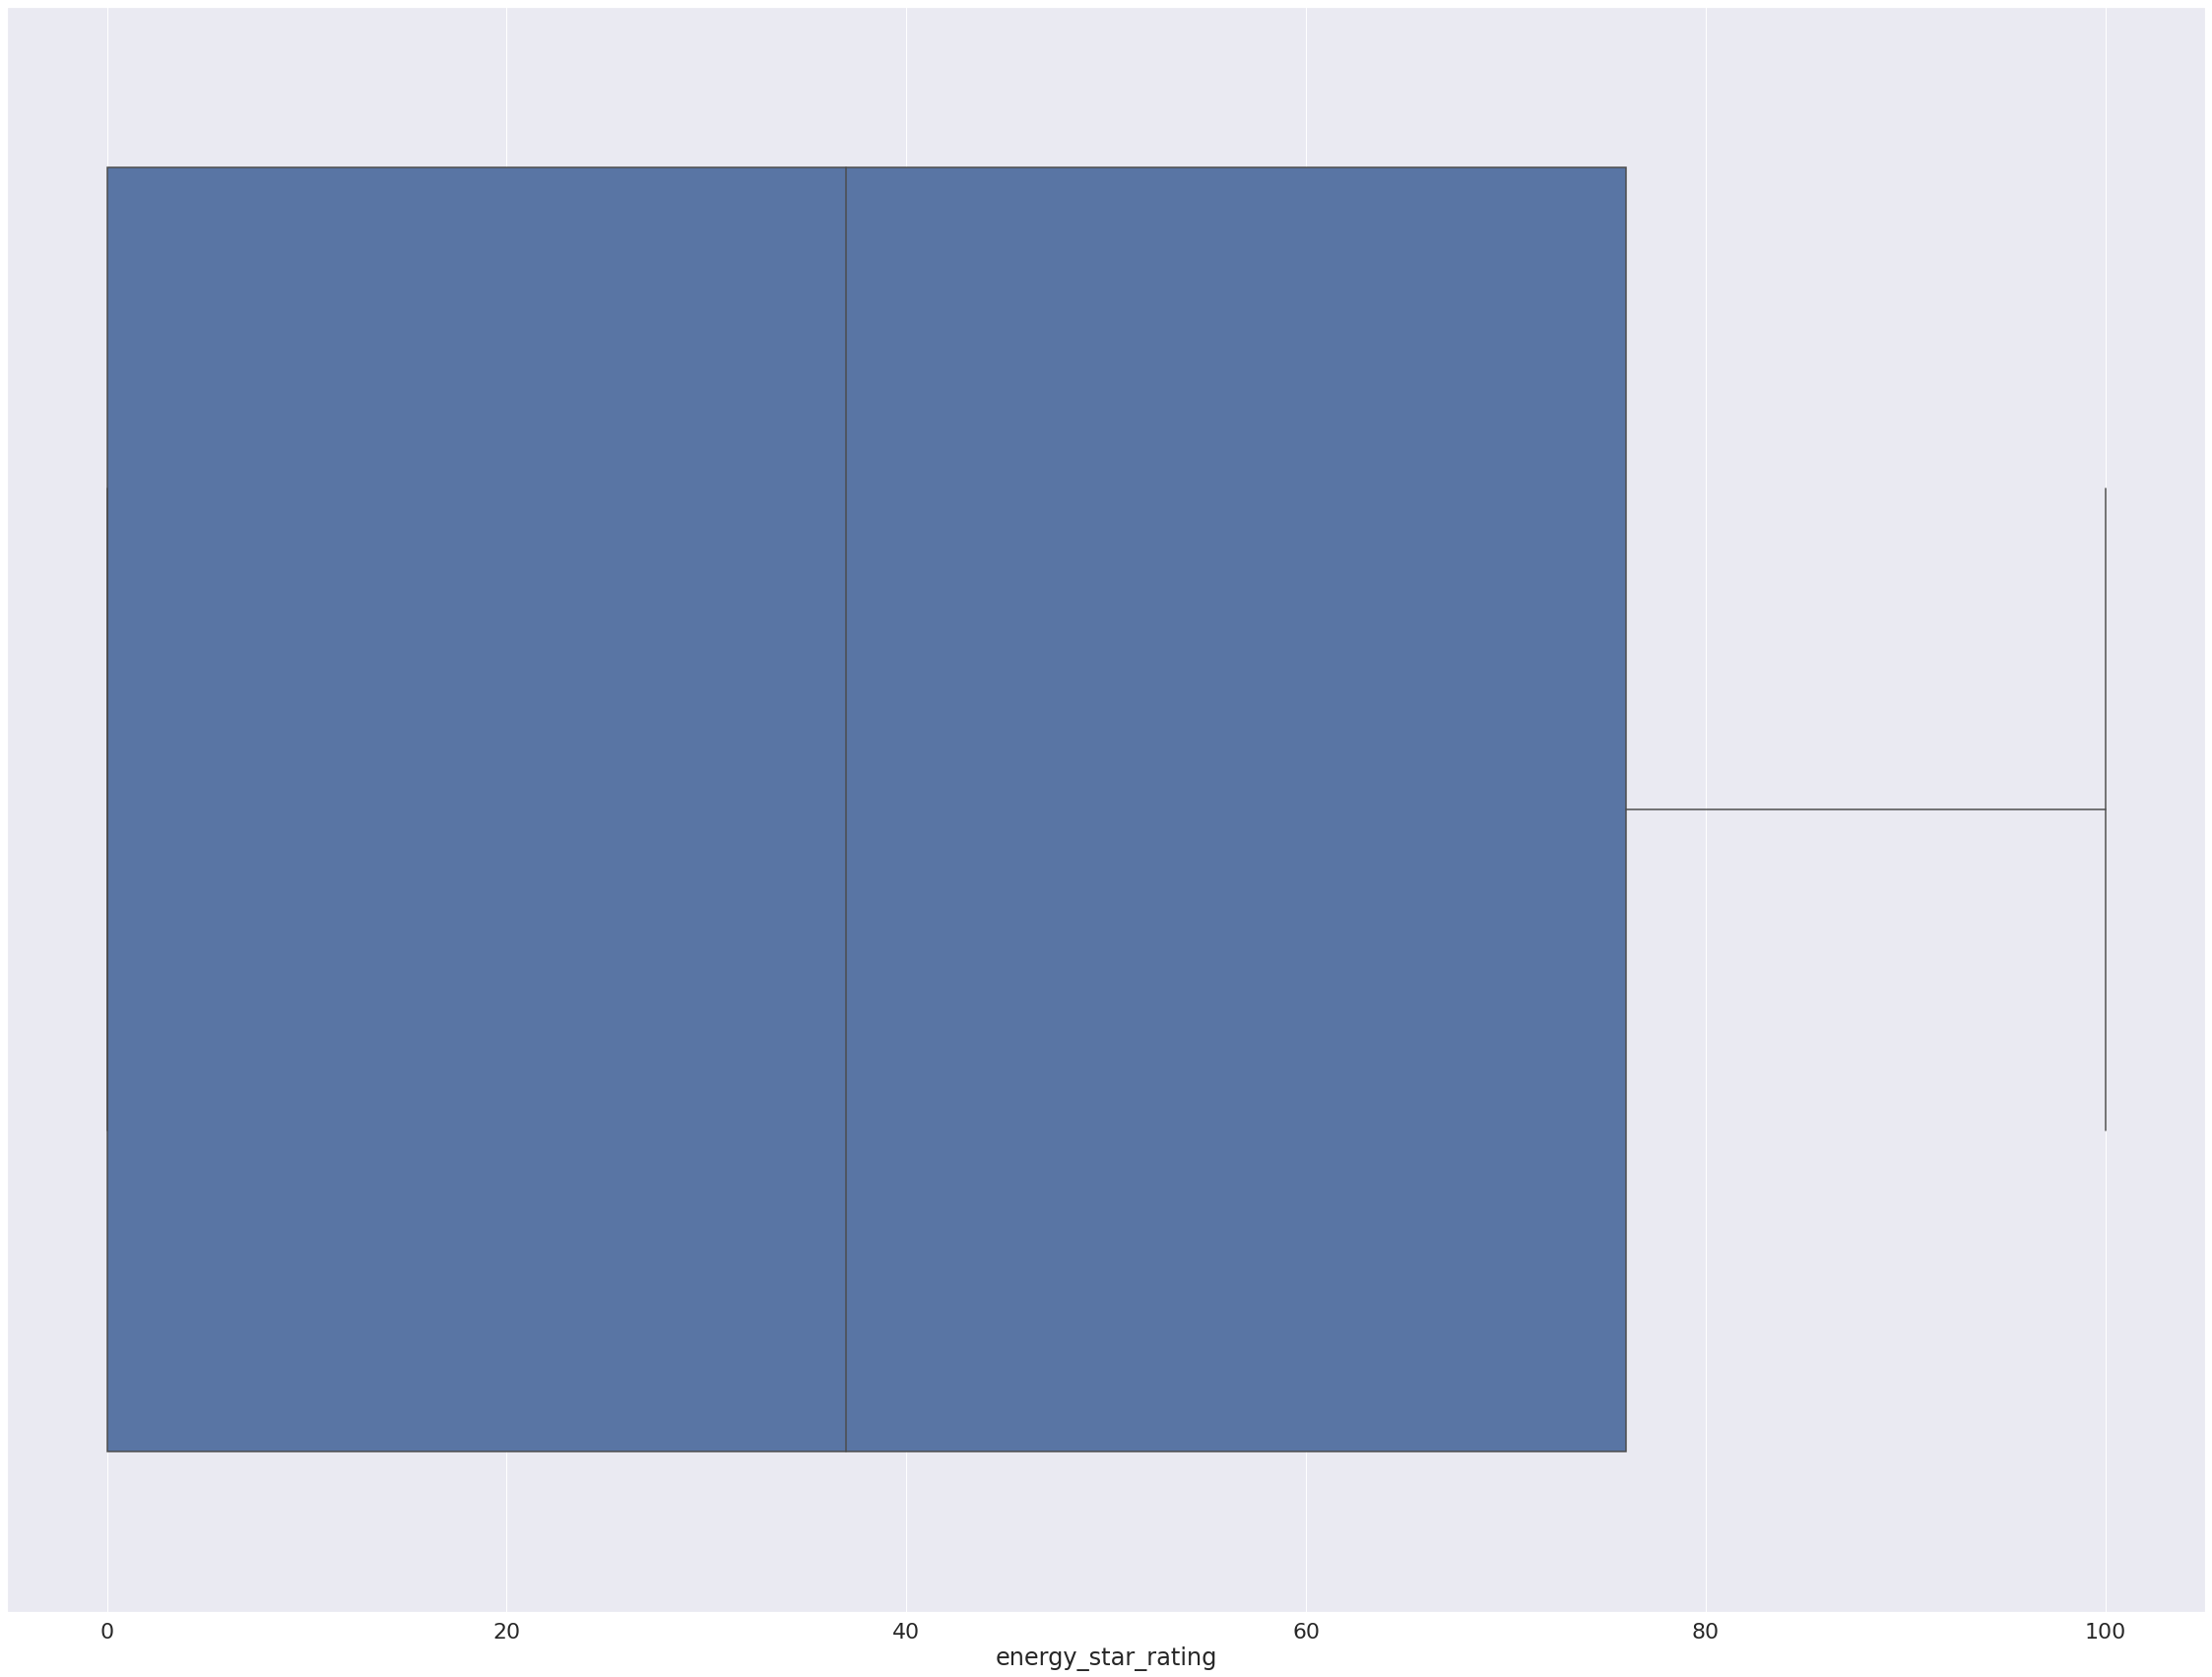

In [22]:
plt.figure(figsize=(40,30))
sns.boxplot(x=train_df['energy_star_rating'])
sns.set(font_scale = 2)

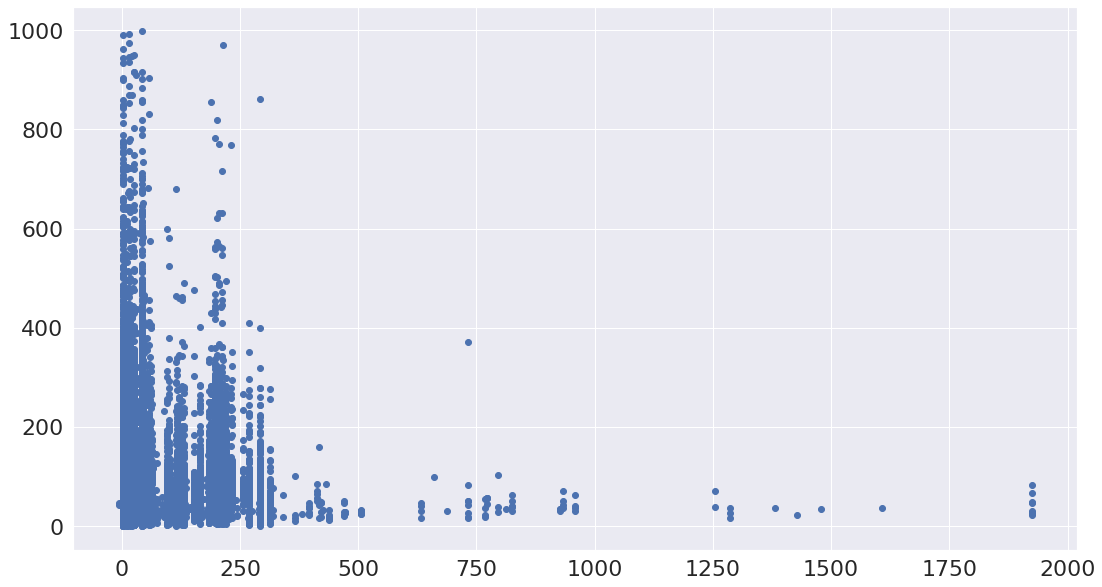

In [23]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(train_df['ELEVATION'], train_df['site_eui'])

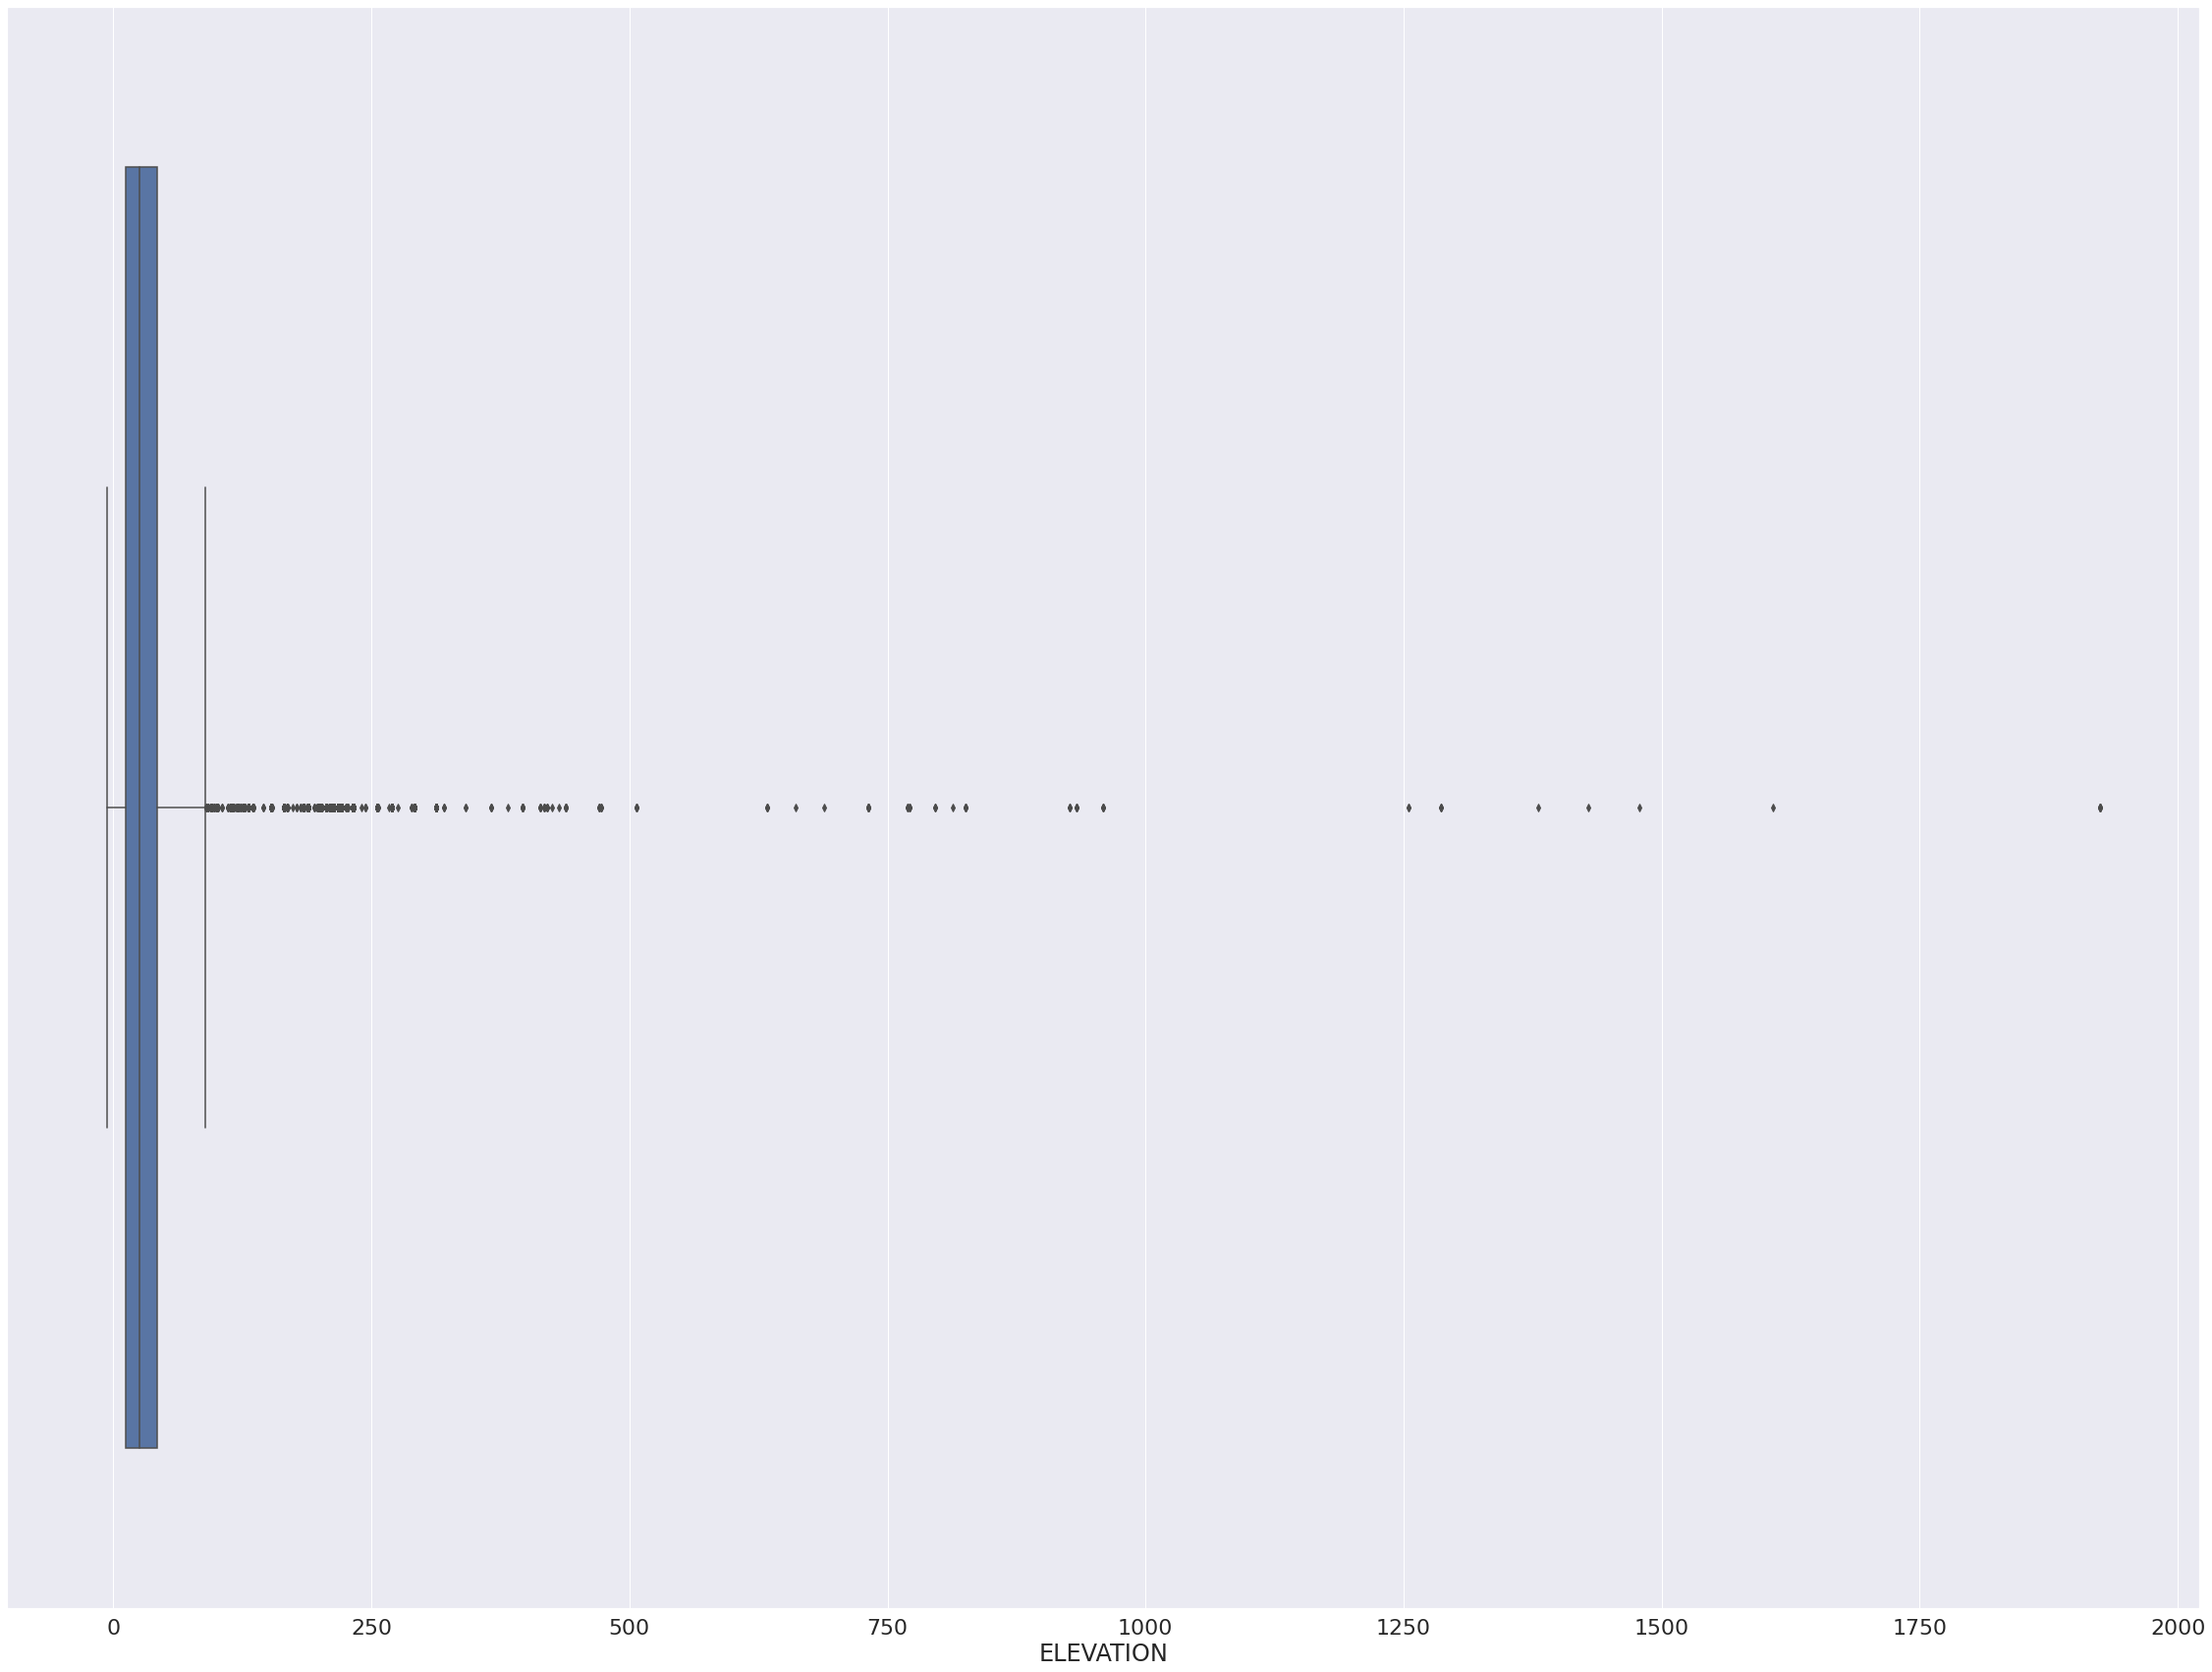

In [24]:
plt.figure(figsize=(40,30))
sns.boxplot(x=train_df['ELEVATION'])
sns.set(font_scale = 2)

In [25]:
from scipy import stats

In [26]:
z = np.abs(stats.zscore(train_df['ELEVATION']))

In [27]:
threshold = 3
print(np.where(z > 3))

(array([  377,   378,   379,   380,   383,   394,   395,   396,   397,
         398,  1013,  1014,  1015,  1017,  1018,  1033,  1034,  1035,
        1036,  1037,  1061,  1062,  1063,  1067,  1087,  1088,  1089,
        1090,  1091,  1092,  1093,  1094,  1095,  1096,  1097,  1098,
        1099,  1100,  1101,  1102,  1107,  1108,  1109,  1110,  1116,
        1117,  1118,  1119,  1120,  1121,  1122,  1123,  1124,  1125,
        1126,  1129,  1130,  1131,  1132,  1133,  1134,  1135,  1136,
        1137,  1138,  1139,  1140,  1141,  1142,  1143,  1144,  1155,
        1156,  1157,  1211,  1212,  1213,  2255,  2256,  2257,  2269,
        2279,  2303,  2307,  2308,  2309,  2310,  2311,  2312,  2313,
        2314,  2315,  2316,  2317,  2318,  2319,  2320,  2321,  2322,
        2370,  2382,  2384,  2385,  2386,  2387,  2414,  2428,  2429,
        2430,  2431,  2432,  3503,  3504,  3508,  3509,  3510,  3511,
        3512,  3513,  3514,  3515,  3516,  3517,  3518,  3519,  3520,
        3521,  3522

In [28]:
train_df.shape

(75757, 64)

In [29]:
train_df['ELEVATION'][(z < 3)].shape

(74882,)

In [30]:
train_df['ELEVATION'][(z > -3) & (z<3)].shape

(74882,)

In [31]:
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
print(pd.DataFrame(IQR).iloc[40:61,:])

                                      0
december_max_temp             11.000000
cooling_degree_days          361.000000
heating_degree_days          692.000000
precipitation_inches           6.970000
snowfall_inches               39.500000
snowdepth_inches             367.000000
avg_temp                       2.068306
days_below_30F                44.000000
days_below_20F                21.000000
days_below_10F                 7.000000
days_below_0F                  0.000000
days_above_80F                25.000000
days_above_90F                11.000000
days_above_100F                0.000000
days_above_110F                0.000000
direction_max_wind_speed       1.000000
direction_peak_wind_speed      1.000000
max_wind_speed                 1.000000
days_with_fog                 99.000000
site_eui                      42.748934
id                         37878.000000


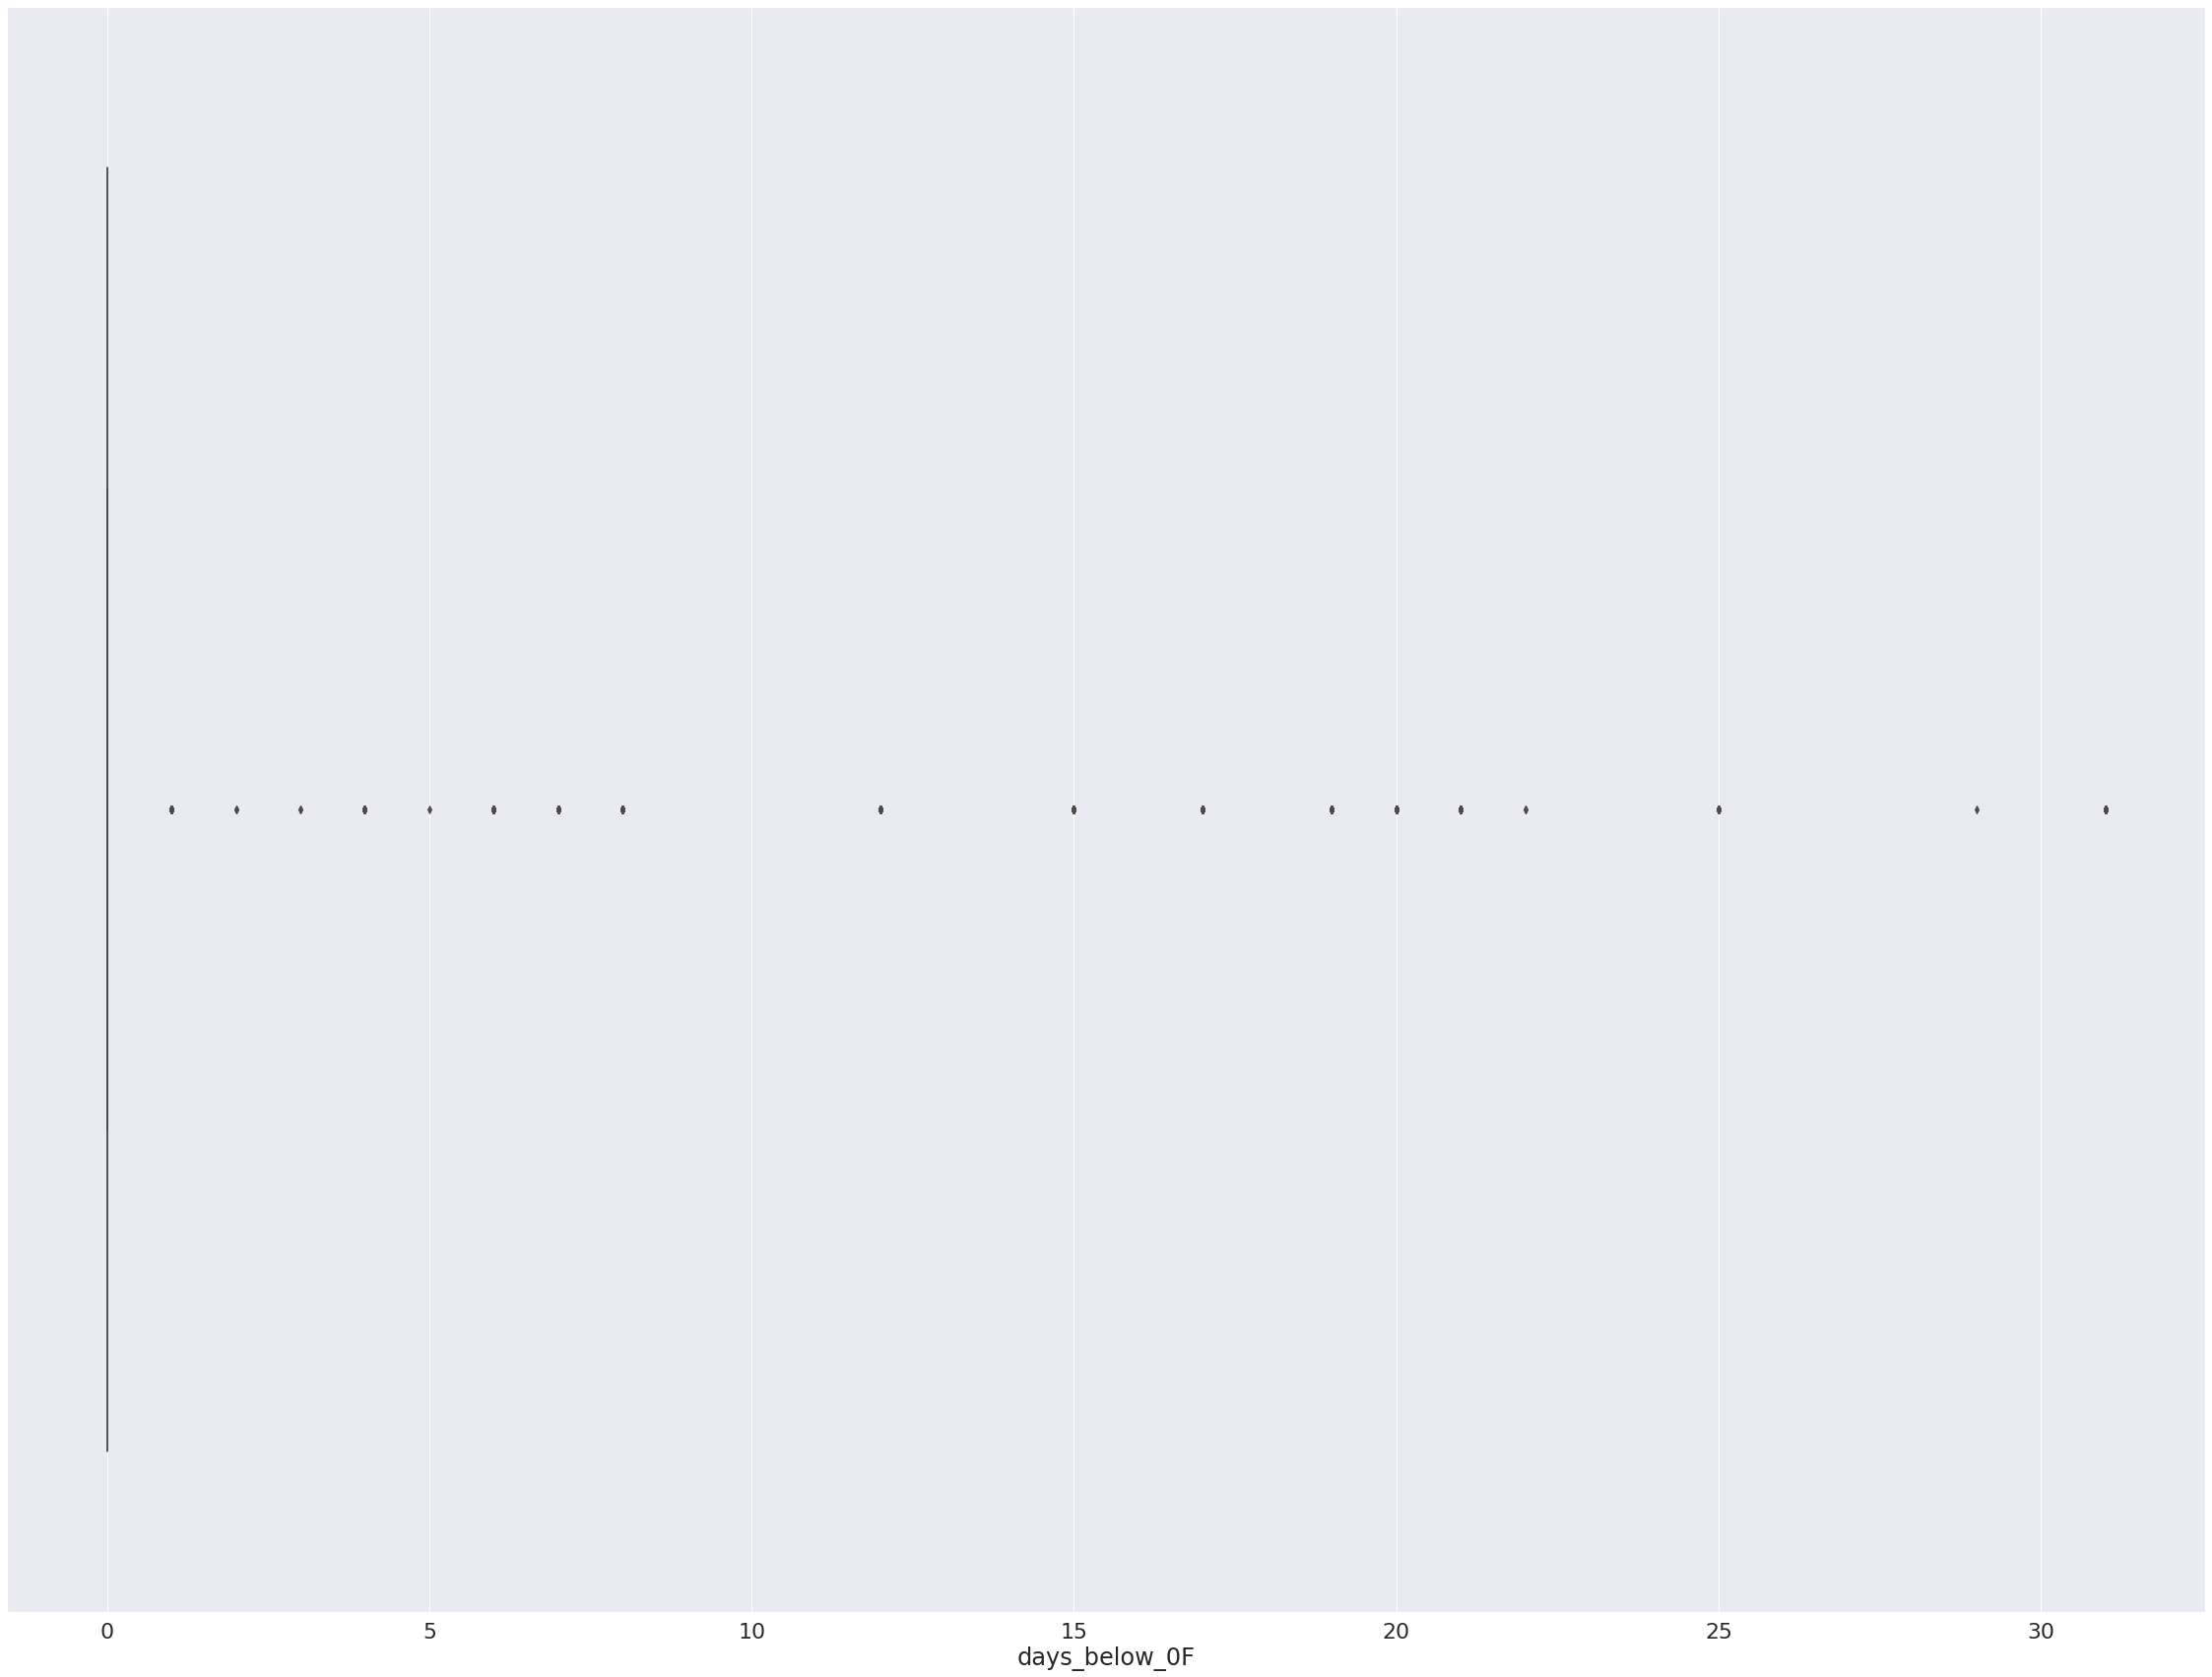

In [32]:
plt.figure(figsize=(40,30))
sns.boxplot(x=train_df['days_below_0F'])
sns.set(font_scale = 2)